In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic
import random

In [2]:
def PDF_logist(x, loc, scale):
    return np.exp((loc-x)/scale)/(scale*(1+np.exp((loc-x)/scale))**2)
def CDF_logist(x, loc, scale):
    return 1/(1+np.exp((loc-x)/scale))

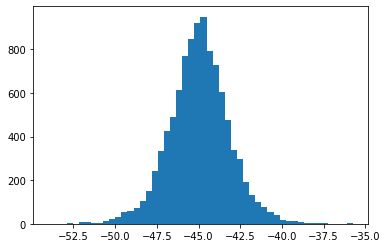

In [3]:
loc, scale = -45, 1
s = np.random.logistic(loc, scale, 10000)
count, bins, ignored = plt.hist(s, bins=50)
lgst_val = PDF_logist(bins, loc, scale)


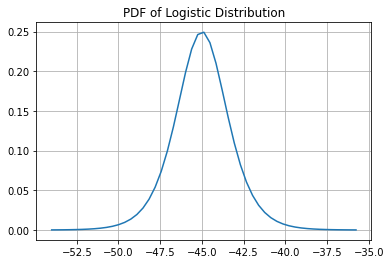

In [4]:
plt.plot(bins, lgst_val)
plt.title('PDF of Logistic Distribution')
plt.grid()
plt.show()

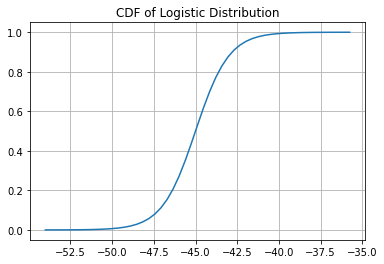

In [5]:
lgst_val = CDF_logist(bins, loc, scale)
plt.title('CDF of Logistic Distribution')
plt.plot(bins, lgst_val)
plt.grid()
plt.show()


**Leaky-integrate-and-fire model**

10001


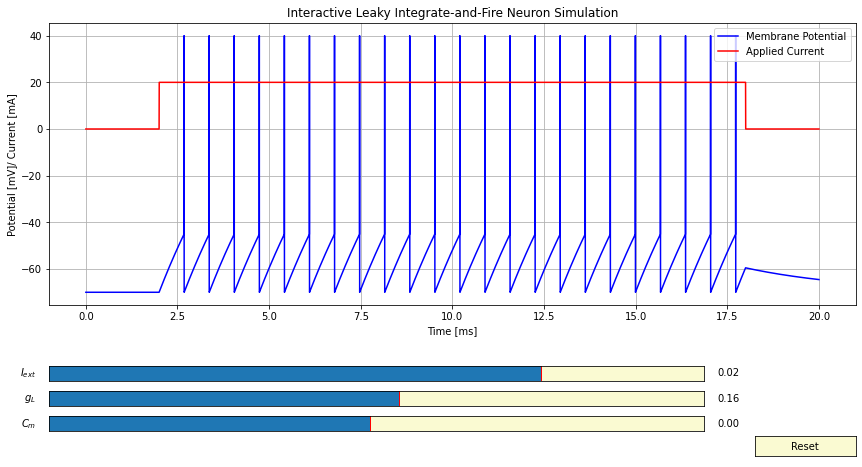

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import  Button, Slider
from scipy.stats import logistic

#==============================================================================#

def LIF(_I=0.02, gl=0.16, Cm=0.0049):

    ######### Constants
    El      =   -0.070                      # restint membrane potential [V]
    thresh  =   -0.045                      # spiking threshold [V]

    ######### Experimental Setup
    # TIME
    T       =   0.200                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]
    # VOLTAGE
    V       =   np.empty(len(time))         # array for saving Voltage history
    V[0]    =   El                          # set initial to resting potential
    # CURRENT
    I = np.zeros(len(time))
    I[1000:9000] = _I
    ######### Measurements
    spikes  =   0                           # counter for number of spikes
    print(len(time))
    ######### Simulation
    for i in range(1, len(time)):
        # use "I - V/R = C * dV/dT" to get this equation
        dV =  (I[i] - gl*(V[i-1]-El))/Cm
        V[i] = V[i-1] + dV*dt

        # in case we exceed threshold
        if V[i] > thresh:
            V[i-1] = 0.04   # set the last step to spike value
            V[i] = El       # current step is resting membrane potential
            spikes += 1     # count spike

    return V

def I_values(_I=0.02, time=None):
    I = np.zeros(len(time))
    I[1000:9000] = _I
    return I

#==============================================================================#

def start_LIF_sim():
    # time parameters for plotting
    T       =   0.200                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]

    # initial parameters
    I_init  =   0.02
    gl_init =   0.16
    Cm_init =   0.0049

    # update functions for lines
    V = LIF(_I=I_init, gl=gl_init, Cm=Cm_init)
    I = I_values(_I=I_init, time=time)

    ######### Plotting
    axis_color = 'lightgoldenrodyellow'

    fig = plt.figure("Leaky Integrate-and-Fire Neuron", figsize=(14, 7))
    ax = fig.add_subplot(111)
    plt.title("Interactive Leaky Integrate-and-Fire Neuron Simulation")
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    line = plt.plot((time*1000)/10, V*1000,color='b', label="Membrane Potential")[0]
    line2 = plt.plot((time*1000)/10, I*1000,color='r', label="Applied Current")[0]

    # add legend
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [mV]/ Current [mA]")
    plt.xlabel("Time [ms]")
    plt.grid()

    # define sliders (position, color, inital value, parameter, etc...)
    I_slider_axis = plt.axes([0.1, 0.17, 0.65, 0.03], facecolor=axis_color)
    I_slider = Slider(I_slider_axis, '$I_{ext}$', -0.01, 0.03, valinit=I_init)

    gl_slider_axis = plt.axes([0.1, 0.12, 0.65, 0.03], facecolor=axis_color)
    gl_slider = Slider(gl_slider_axis, '$g_{L}$', 0.0, 0.3, valinit=gl_init)

    Cm_slider_axis = plt.axes([0.1, 0.07, 0.65, 0.03], facecolor=axis_color)
    Cm_slider = Slider(Cm_slider_axis, '$C_{m}$', 0.0, 0.01, valinit=Cm_init)

    # update functions
    def update(val):
        line.set_ydata(LIF(I_slider.val, gl_slider.val, Cm_slider.val))
        line2.set_ydata(I_values(I_slider.val, time=time))

    # update, if any slider is moved
    I_slider.on_changed(update)
    gl_slider.on_changed(update)
    Cm_slider.on_changed(update)

    # Add a button for resetting the parameters
    reset_button_ax = plt.axes([0.8, 0.02, 0.1, 0.04])
    reset_button = Button(
        reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')

    # event of resert button being clicked
    def reset_button_was_clicked(event):
        I_slider.reset()
        gl_slider.reset()
        Cm_slider.reset()

    reset_button.on_clicked(reset_button_was_clicked)

    plt.show()


#==============================================================================#

if (__name__ == '__main__'):
    start_LIF_sim()


**Noisy Output Model**

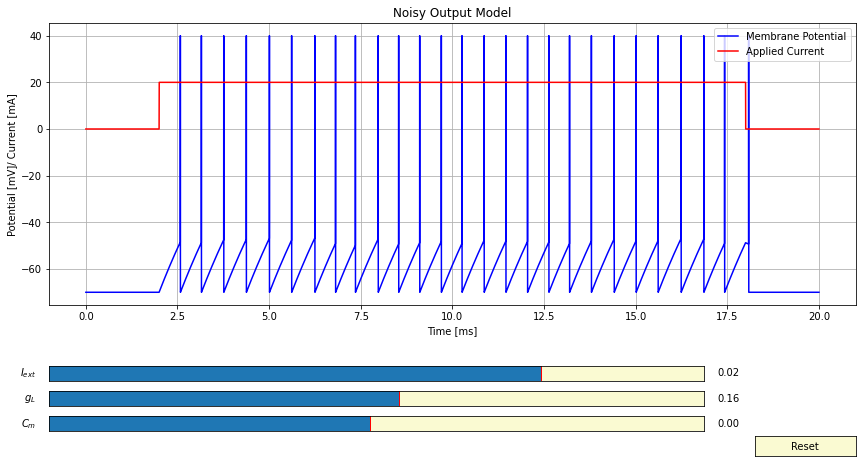

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import  Button, Slider
from scipy.stats import logistic

#==============================================================================#

def nom(_I=0.02, gl=0.16, Cm=0.0049):

    ######### Constants
    El      =   -0.070                      # restint membrane potential [V]
    thresh  =   -0.045                      # spiking threshold [V]

    ######### Experimental Setup
    # TIME
    T       =   0.200                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]
    # VOLTAGE
    V       =   np.empty(len(time))         # array for saving Voltage history
    V[0]    =   El                          # set initial to resting potential
    # CURRENT
    I = np.zeros(len(time))
    I[1000:9000] = _I
    ######### Measurements
    spikes  =   0 
    V_th=[]                          # counter for number of spikes
    p=[]
    int_v=[0]
    list_vth=[]
    for i in range(-50,-40):
      list_vth.append(i)
      p.append(logistic.pdf(i,loc=-45,scale=1))
    vth=random.choices(list_vth, weights=p, cum_weights=None, k=len(time))
    
    ######### Simulation
    for i in range(1, len(time)):
        # use "I - V/R = C * dV/dT" to get this equation
        dV =  (I[i] - gl*(V[i-1]-El))/Cm
        V[i] = V[i-1] + dV*dt
        #
        if ((V[i]*1000) > vth[i]):
            #print(np.random.choice(vth))
            #if((int((V[i]*1000)) in int_v) == False):
            #int_v.append(vth[)
            V_th.append(V[i])
            V[i-1] = 0.04   # set the last step to spike value
            V[i] = El       # current step is resting membrane potential
            spikes += 1     # count spike

    return V

def I_values(_I=0.02, time=None):
    I = np.zeros(len(time))
    I[1000:9000] = _I
    return I

#==============================================================================#

def start_nom_sim():
    # time parameters for plotting
    T       =   0.200                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]

    # initial parameters
    I_init  =   0.02
    gl_init =   0.16
    Cm_init =   0.0049

    # update functions for lines
    V = nom(_I=I_init, gl=gl_init, Cm=Cm_init)
    I = I_values(_I=I_init, time=time)

    ######### Plotting
    axis_color = 'lightgoldenrodyellow'

    fig = plt.figure("Noisy Output Model", figsize=(14, 7))
    ax = fig.add_subplot(111)
    plt.title("Noisy Output Model")
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    line = plt.plot((time*1000)/10, V*1000,color='b', label="Membrane Potential")[0]
    line2 = plt.plot((time*1000)/10, I*1000,color='r', label="Applied Current")[0]

    # add legend
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [mV]/ Current [mA]")
    plt.xlabel("Time [ms]")
    plt.grid()

    # define sliders (position, color, inital value, parameter, etc...)
    I_slider_axis = plt.axes([0.1, 0.17, 0.65, 0.03], facecolor=axis_color)
    I_slider = Slider(I_slider_axis, '$I_{ext}$', -0.01, 0.03, valinit=I_init)

    gl_slider_axis = plt.axes([0.1, 0.12, 0.65, 0.03], facecolor=axis_color)
    gl_slider = Slider(gl_slider_axis, '$g_{L}$', 0.0, 0.3, valinit=gl_init)

    Cm_slider_axis = plt.axes([0.1, 0.07, 0.65, 0.03], facecolor=axis_color)
    Cm_slider = Slider(Cm_slider_axis, '$C_{m}$', 0.0, 0.01, valinit=Cm_init)

    # update functions
    def update(val):
        line.set_ydata(LIF(I_slider.val, gl_slider.val, Cm_slider.val))
        line2.set_ydata(I_values(I_slider.val, time=time))

    # update, if any slider is moved
    I_slider.on_changed(update)
    gl_slider.on_changed(update)
    Cm_slider.on_changed(update)

    # Add a button for resetting the parameters
    reset_button_ax = plt.axes([0.8, 0.02, 0.1, 0.04])
    reset_button = Button(
        reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')

    # event of resert button being clicked
    def reset_button_was_clicked(event):
        I_slider.reset()
        gl_slider.reset()
        Cm_slider.reset()

    reset_button.on_clicked(reset_button_was_clicked)

    plt.show()


#==============================================================================#

if (__name__ == '__main__'):
    start_nom_sim()


**Changing RI**

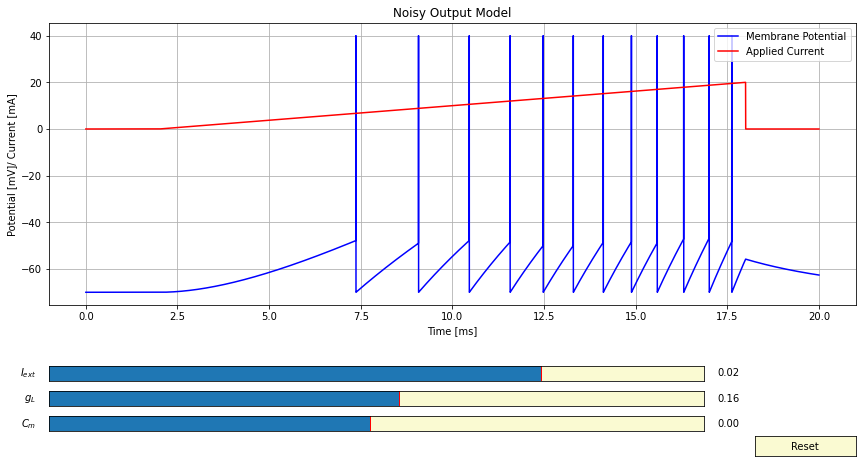

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import  Button, Slider
from scipy.stats import logistic

#==============================================================================#

def nom(_I=0.02, gl=0.16, Cm=0.0049):

    ######### Constants
    El      =   -0.070                      # restint membrane potential [V]
    thresh  =   -0.045                      # spiking threshold [V]

    ######### Experimental Setup
    # TIME
    T       =   0.200                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]
    # VOLTAGE
    V       =   np.empty(len(time))         # array for saving Voltage history
    V[0]    =   El                          # set initial to resting potential
    # CURRENT
    I = np.zeros(len(time))
    I[1000:9000] =np.linspace(0,_I,9000-1000)
    ######### Measurements
    spikes  =   0 
    V_th=[]                          # counter for number of spikes
    p=[]
    int_v=[0]
    list_vth=[]
    for i in range(-50,-40):
      list_vth.append(i)
      p.append(logistic.pdf(i,loc=-45,scale=1))
    vth=random.choices(list_vth, weights=p, cum_weights=None, k=len(time))
    
    ######### Simulation
    for i in range(1, len(time)):
        # use "I - V/R = C * dV/dT" to get this equation
        dV =  (I[i] - gl*(V[i-1]-El))/Cm
        V[i] = V[i-1] + dV*dt
        #
        if ((V[i]*1000) > vth[i]):
            #print(np.random.choice(vth))
            #if((int((V[i]*1000)) in int_v) == False):
            #int_v.append(vth[)
            V_th.append(V[i])
            V[i-1] = 0.04   # set the last step to spike value
            V[i] = El       # current step is resting membrane potential
            spikes += 1     # count spike
    return V

def I_values(_I=0.02, time=None):
    I = np.zeros(len(time))
    I[1000:9000] = np.linspace(0,_I,9000-1000)
    return I

#==============================================================================#

def start_nom_sim():
    # time parameters for plotting
    T       =   0.200                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]

    # initial parameters
    I_init  =   0.02
    gl_init =   0.16
    Cm_init =   0.0049

    # update functions for lines
    V = nom(_I=I_init, gl=gl_init, Cm=Cm_init)
    I = I_values(_I=I_init, time=time)

    ######### Plotting
    axis_color = 'lightgoldenrodyellow'

    fig = plt.figure("Noisy Output Model", figsize=(14, 7))
    ax = fig.add_subplot(111)
    plt.title("Noisy Output Model")
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    line = plt.plot((time*1000)/10, V*1000,color='b', label="Membrane Potential")[0]
    line2 = plt.plot((time*1000)/10, I*1000,color='r', label="Applied Current")[0]

    # add legend
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [mV]/ Current [mA]")
    plt.xlabel("Time [ms]")
    plt.grid()

    # define sliders (position, color, inital value, parameter, etc...)
    I_slider_axis = plt.axes([0.1, 0.17, 0.65, 0.03], facecolor=axis_color)
    I_slider = Slider(I_slider_axis, '$I_{ext}$', -0.01, 0.03, valinit=I_init)

    gl_slider_axis = plt.axes([0.1, 0.12, 0.65, 0.03], facecolor=axis_color)
    gl_slider = Slider(gl_slider_axis, '$g_{L}$', 0.0, 0.3, valinit=gl_init)

    Cm_slider_axis = plt.axes([0.1, 0.07, 0.65, 0.03], facecolor=axis_color)
    Cm_slider = Slider(Cm_slider_axis, '$C_{m}$', 0.0, 0.01, valinit=Cm_init)

    # update functions
    def update(val):
        line.set_ydata(LIF(I_slider.val, gl_slider.val, Cm_slider.val))
        line2.set_ydata(I_values(I_slider.val, time=time))

    # update, if any slider is moved
    I_slider.on_changed(update)
    gl_slider.on_changed(update)
    Cm_slider.on_changed(update)

    # Add a button for resetting the parameters
    reset_button_ax = plt.axes([0.8, 0.02, 0.1, 0.04])
    reset_button = Button(
        reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')

    # event of resert button being clicked
    def reset_button_was_clicked(event):
        I_slider.reset()
        gl_slider.reset()
        Cm_slider.reset()

    reset_button.on_clicked(reset_button_was_clicked)

    plt.show()


#==============================================================================#

if (__name__ == '__main__'):
    start_nom_sim()


**Part 3**

**Histogram**

61


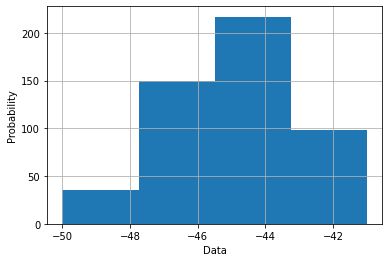

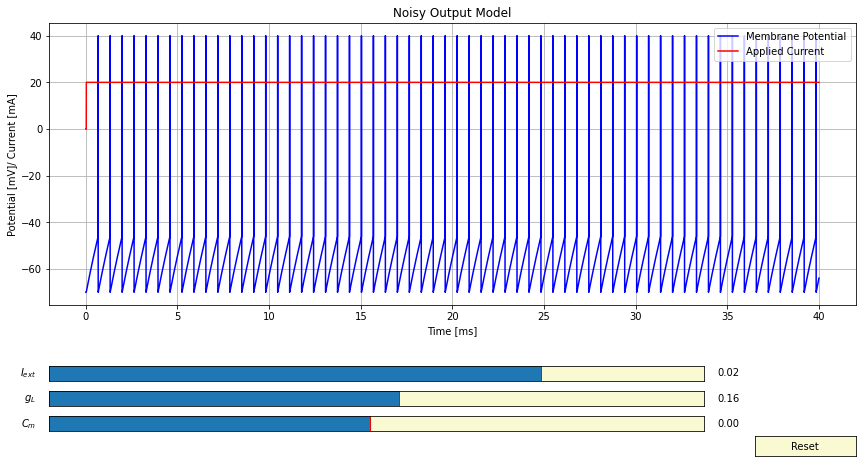

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import  Button, Slider
from scipy.stats import logistic
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

#==============================================================================#

def nom(_I=0.02, gl=0.16, Cm=0.0049):

    ######### Constants
    El      =   -0.070                      # restint membrane potential [V]
    thresh  =   -0.045                      # spiking threshold [V]

    ######### Experimental Setup
    # TIME
    T       =   0.4                       # total simulation length [s]
    dt      =   0.0000002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]
    # VOLTAGE
    V       =   np.empty(len(time))         # array for saving Voltage history
    V[0]    =   El                          # set initial to resting potential
    # CURRENT
    I = np.zeros(len(time))
    I[1000:] = _I
    ######### Measurements
    spikes  =   0 
    V_th=[]                          # counter for number of spikes
    p=[]
    int_v=[0]
    list_vth=[]
    for i in range(-50,-40):
      list_vth.append(i)
      p.append(logistic.pdf(i,loc=-45,scale=1))
    vth=random.choices(list_vth, weights=p, cum_weights=None, k=500)
    
    ######### Simulation
    for i in range(1, len(time)):
        # use "I - V/R = C * dV/dT" to get this equation
        dV =  (I[i] - gl*(V[i-1]-El))/Cm
        V[i] = V[i-1] + dV*dt
        #
        if ((V[i]*1000) > vth[5]):
            #print(np.random.choice(vth))
            #if((int((V[i]*1000)) in int_v) == False):
            #int_v.append(vth[)
            V_th.append(V[i])
            V[i-1] = 0.04   # set the last step to spike value
            V[i] = El       # current step is resting membrane potential
            spikes += 1     # count spike

  
    print(len(V_th))
    l= [x*1000 for x in V_th]
    plt.figure("Histogram")
    plt.hist(vth, bins=4)  # density=False would make counts
    plt.ylabel('Probability')
    plt.xlabel('Data')
    plt.grid()

    return V

def I_values(_I=0.02, time=None):
    I = np.zeros(len(time))
    I[1000:] = _I
    return I

#==============================================================================#

def start_nom_sim():
    # time parameters for plotting
    T       =   0.4                      # total simulation length [s]
    dt      =   0.0000002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]

    # initial parameters
    I_init  =   0.02
    gl_init =   0.16
    Cm_init =   0.0049

    # update functions for lines
    V = nom(_I=I_init, gl=gl_init, Cm=Cm_init)
    I = I_values(_I=I_init, time=time)

    ######### Plotting
    axis_color = 'lightgoldenrodyellow'

    fig = plt.figure("Noisy Output Model", figsize=(14, 7))
    ax = fig.add_subplot(111)
    plt.title("Noisy Output Model")
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    line = plt.plot((time*1000)/10, V*1000,color='b', label="Membrane Potential")[0]
    line2 = plt.plot((time*1000)/10, I*1000,color='r', label="Applied Current")[0]

    # add legend
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [mV]/ Current [mA]")
    plt.xlabel("Time [ms]")
    plt.grid()

    # define sliders (position, color, inital value, parameter, etc...)
    I_slider_axis = plt.axes([0.1, 0.17, 0.65, 0.03], facecolor=axis_color)
    I_slider = Slider(I_slider_axis, '$I_{ext}$', -0.01, 0.03, valinit=I_init)

    gl_slider_axis = plt.axes([0.1, 0.12, 0.65, 0.03], facecolor=axis_color)
    gl_slider = Slider(gl_slider_axis, '$g_{L}$', 0.0, 0.3, valinit=gl_init)

    Cm_slider_axis = plt.axes([0.1, 0.07, 0.65, 0.03], facecolor=axis_color)
    Cm_slider = Slider(Cm_slider_axis, '$C_{m}$', 0.0, 0.01, valinit=Cm_init)

    # update functions
    def update(val):
        line.set_ydata(LIF(I_slider.val, gl_slider.val, Cm_slider.val))
        line2.set_ydata(I_values(I_slider.val, time=time))

    # update, if any slider is moved
    I_slider.on_changed(update)
    gl_slider.on_changed(update)
    Cm_slider.on_changed(update)

    # Add a button for resetting the parameters
    reset_button_ax = plt.axes([0.8, 0.02, 0.1, 0.04])
    reset_button = Button(
        reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')

    # event of resert button being clicked
    def reset_button_was_clicked(event):
        I_slider.reset()
        gl_slider.reset()
        Cm_slider.reset()

    reset_button.on_clicked(reset_button_was_clicked)

    plt.show()


#==============================================================================#

if (__name__ == '__main__'):
    start_nom_sim()


136


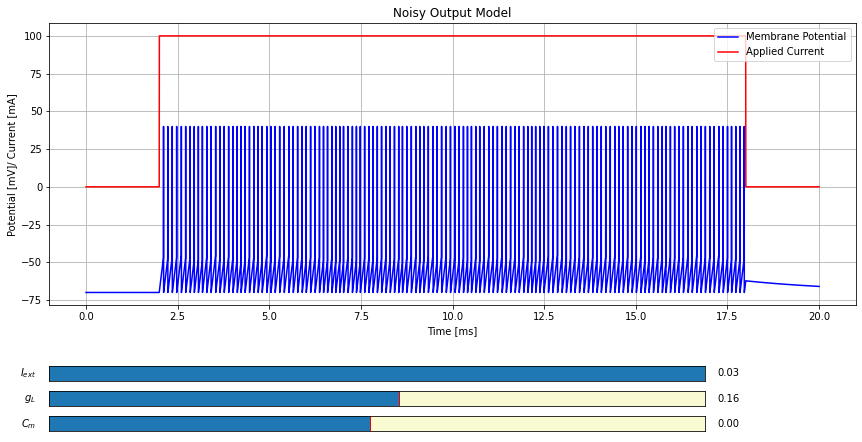

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import  Button, Slider
from scipy.stats import logistic

#==============================================================================#

def nom(_I=0.1, gl=0.16, Cm=0.0049):

    ######### Constants
    El      =   -0.070                      # restint membrane potential [V]
    thresh  =   -0.045                      # spiking threshold [V]

    ######### Experimental Setup
    # TIME
    T       =   0.200                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]
    # VOLTAGE
    V       =   np.empty(len(time))         # array for saving Voltage history
    V[0]    =   El                          # set initial to resting potential
    # CURRENT
    I = np.zeros(len(time))
    I[1000:9000] = _I
    ######### Measurements
    spikes  =   0 
    V_th=[]                          # counter for number of spikes
    p=[]
    int_v=[0]
    list_vth=[]
    for i in range(-50,-40):
      list_vth.append(i)
      p.append(logistic.pdf(i,loc=-45,scale=1))
    vth=random.choices(list_vth, weights=p, cum_weights=None, k=len(time))
    
    ######### Simulation
    for i in range(1, len(time)):
        # use "I - V/R = C * dV/dT" to get this equation
        dV =  (I[i] - gl*(V[i-1]-El))/Cm
        V[i] = V[i-1] + dV*dt
        #
        if ((V[i]*1000) > vth[i]):
            #print(np.random.choice(vth))
            #if((int((V[i]*1000)) in int_v) == False):
            #int_v.append(vth[)
            V_th.append(V[i])
            V[i-1] = 0.04   # set the last step to spike value
            V[i] = El       # current step is resting membrane potential
            spikes += 1     # count spike

    return V,spikes

def I_values(_I=0.1, time=None):
    I = np.zeros(len(time))
    I[1000:9000] = _I
    return I

#==============================================================================#

def start_nom_sim():
    # time parameters for plotting
    T       =   0.200                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]

    # initial parameters
    I_init  =   0.1
    gl_init =   0.16
    Cm_init =   0.0049

    # update functions for lines
    V,spikes = nom(_I=I_init, gl=gl_init, Cm=Cm_init)
    I = I_values(_I=I_init, time=time)

    ######### Plotting
    axis_color = 'lightgoldenrodyellow'

    fig = plt.figure("Noisy Output Model", figsize=(14, 7))
    ax = fig.add_subplot(111)
    plt.title("Noisy Output Model")
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    line = plt.plot((time*1000)/10, V*1000,color='b', label="Membrane Potential")[0]
    line2 = plt.plot((time*1000)/10, I*1000,color='r', label="Applied Current")[0]

    # add legend
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [mV]/ Current [mA]")
    plt.xlabel("Time [ms]")
    plt.grid()

    # define sliders (position, color, inital value, parameter, etc...)
    I_slider_axis = plt.axes([0.1, 0.17, 0.65, 0.03], facecolor=axis_color)
    I_slider = Slider(I_slider_axis, '$I_{ext}$', -0.01, 0.03, valinit=I_init)

    gl_slider_axis = plt.axes([0.1, 0.12, 0.65, 0.03], facecolor=axis_color)
    gl_slider = Slider(gl_slider_axis, '$g_{L}$', 0.0, 0.3, valinit=gl_init)

    Cm_slider_axis = plt.axes([0.1, 0.07, 0.65, 0.03], facecolor=axis_color)
    Cm_slider = Slider(Cm_slider_axis, '$C_{m}$', 0.0, 0.01, valinit=Cm_init)
    return spikes 
    

    # update functions
    def update(val):
        line.set_ydata(LIF(I_slider.val, gl_slider.val, Cm_slider.val))
        line2.set_ydata(I_values(I_slider.val, time=time))

    # update, if any slider is moved
    I_slider.on_changed(update)
    gl_slider.on_changed(update)
    Cm_slider.on_changed(update)

    # Add a button for resetting the parameters
    reset_button_ax = plt.axes([0.8, 0.02, 0.1, 0.04])
    reset_button = Button(
        reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')

    # event of resert button being clicked
    def reset_button_was_clicked(event):
        I_slider.reset()
        gl_slider.reset()
        Cm_slider.reset()

    reset_button.on_clicked(reset_button_was_clicked)

    plt.show()
    


#==============================================================================#

if (__name__ == '__main__'):
    sp=start_nom_sim()
print(sp)
    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


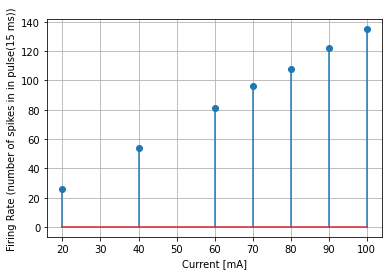

In [11]:
F=[26,54,81,96,108,122,135]
i=[20,40,60,70,80,90,100]
plt.stem(i, F);
plt.ylabel("Firing Rate (number of spikes in in pulse(15 ms))")
plt.xlabel("Current [mA]")
plt.grid()

